In [1]:
from hybrid_recommenders.item_knn_cf_cbf_concatenated import item_knn_cf_cbf
from utils.evaluator.evaluator import evaluator
from utils.submission_helper import submission_helper
from utils.data_manager.data_manager import data_manager
from utils.data_manager.splitter import splitter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
training, validation, test = splitter().get_train_evaluation_test(percentage_of_training_data=0.6,
                                                                  percentage_of_validation_data=0.2)


In [3]:
k_vector = [70,140,210,280,370,460,560]
similarities = ['pearson', 'cosine', 'adjusted', 'asymmetric', 'jaccard', 'tanimoto',
                             'dice', 'tversky']
map_vector = []
map_total_vector = []
for similarity in similarities:
    for k in k_vector:
        recommender_experiment = item_knn_cf_cbf()
        recommender_experiment.fit(training_set=training.copy(),
                                   k=k,
                                   shrink=246,
                                   similarity=similarity)
        map_vector.append(evaluator.evaluate_already_trained(recommender=recommender_experiment)[2])
    print(map_vector)
    map_total_vector.append(map_vector)
    map_vector=[]

Similarity column 25975 ( 100 % ), 1138.40 column/sec, elapsed time 0.38 min
Similarity column 25975 ( 100 % ), 1088.37 column/sec, elapsed time 0.40 min
Similarity column 25975 ( 100 % ), 1086.02 column/sec, elapsed time 0.40 min
Similarity column 25975 ( 100 % ), 1252.74 column/sec, elapsed time 0.35 min
Similarity column 25975 ( 100 % ), 1218.58 column/sec, elapsed time 0.36 min
Similarity column 25975 ( 100 % ), 976.26 column/sec, elapsed time 0.44 min
Similarity column 25975 ( 100 % ), 1133.19 column/sec, elapsed time 0.38 min
[0.02322855761447058, 0.023764679097672704, 0.023980201663740385, 0.024113331413181654, 0.024324072537963218, 0.024384611593279096, 0.024305170051281584]
Similarity column 25975 ( 100 % ), 1139.86 column/sec, elapsed time 0.38 min
Similarity column 25975 ( 100 % ), 1181.18 column/sec, elapsed time 0.37 min
Similarity column 25975 ( 100 % ), 1096.37 column/sec, elapsed time 0.39 min
Similarity column 25975 ( 100 % ), 1224.63 column/sec, elapsed time 0.35 min


0  0
0  1
1  0
1  1
2  0
2  1
3  0
3  1


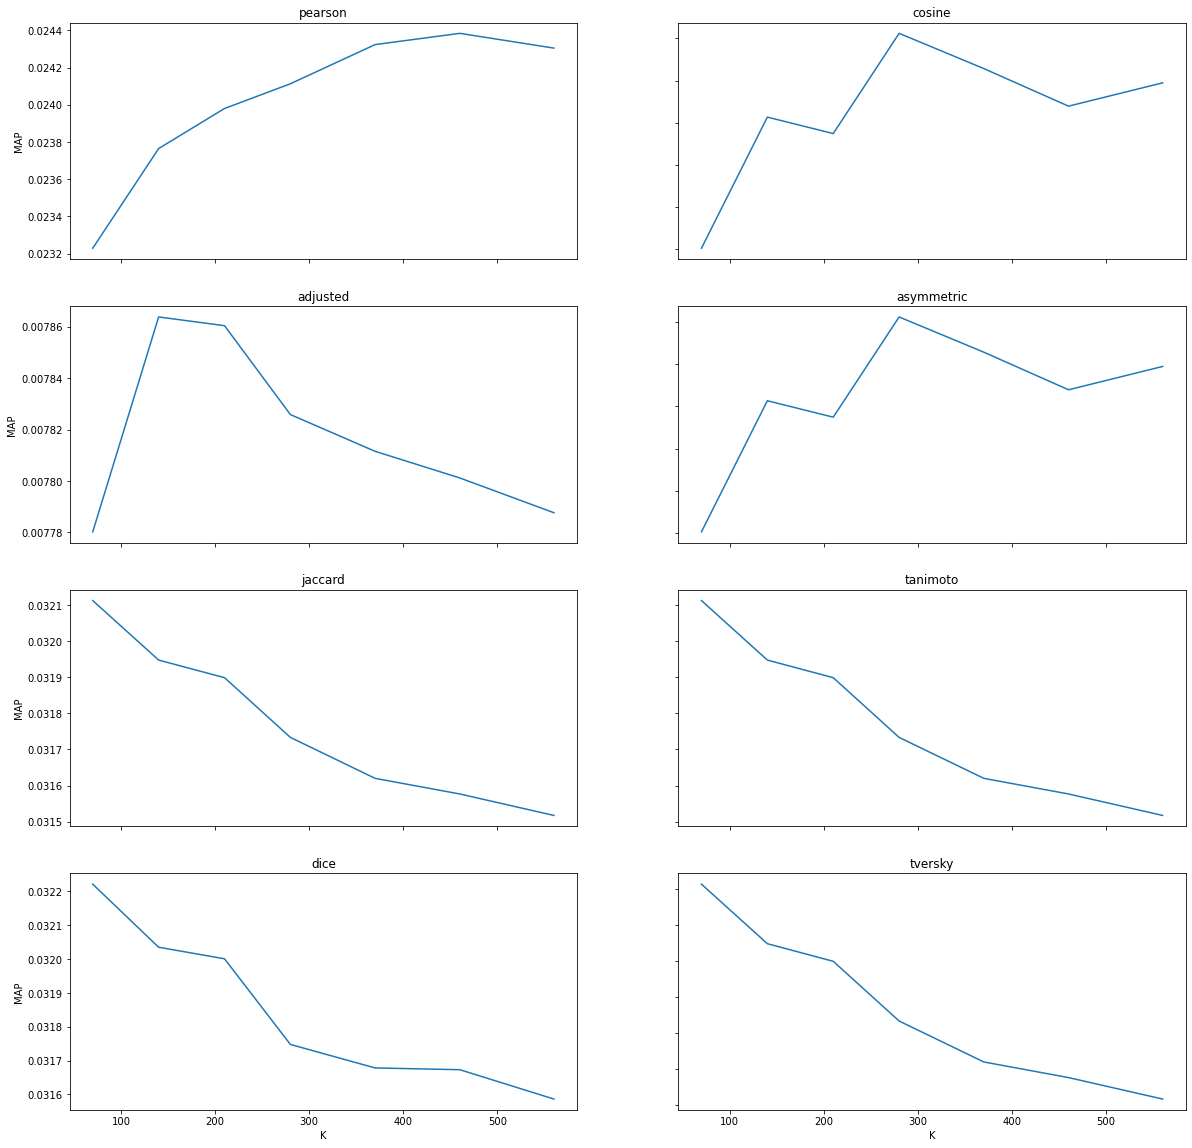

In [8]:
fig , axs = plt.subplots(4, 2, figsize=(20,20))
index = 0
for row in range(0,4):
    for column in range(0,2):
        print(row, "", column)
        axs[row, column].plot(k_vector, map_total_vector[index] )
        axs[row,column].set_title(similarities[index])
        index += 1
for ax in axs.flat:
    ax.set(xlabel='K', ylabel='MAP')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


In [6]:
map_value = np.max([np.max(array) for array in map_total_vector])
map_value

0.03251211241397108

In [9]:
best_similarity_index = np.argmax([np.max(m) for m in map_total_vector])
similarities[best_similarity_index]

'cosine'

In [10]:
best_k_index = np.argmax(map_total_vector[best_similarity_index])
k_max = k_vector[best_k_index]
k_max

280

In [3]:
tmp = [10,20,30]
shrinks = [i for i in range(60,600, 30)]
shrinks = tmp+shrinks
map_vector = []
for shrink in shrinks:
    print(shrink)
    recommender_experiment = item_knn_cf_cbf()
    recommender_experiment.fit(training_set=training.copy(),
                                   k=280,
                                   shrink=shrink,
                                   similarity='cosine')
    map_vector.append(evaluator.evaluate_already_trained(recommender=recommender_experiment)[2])
    print(map_vector[-1])

10
Similarity column 25975 ( 100 % ), 961.82 column/sec, elapsed time 0.45 min
0.028825741506063488
20
Similarity column 25975 ( 100 % ), 1277.50 column/sec, elapsed time 0.34 min
0.03015459178502058
30
Similarity column 25975 ( 100 % ), 1016.61 column/sec, elapsed time 0.43 min
0.030714939822075713
60
Similarity column 25975 ( 100 % ), 1060.30 column/sec, elapsed time 0.41 min
0.031743142219692974
90
Similarity column 25975 ( 100 % ), 1066.44 column/sec, elapsed time 0.41 min
0.032089018398560515
120
Similarity column 25975 ( 100 % ), 1306.71 column/sec, elapsed time 0.33 min
0.032265815556876985
150
Similarity column 25975 ( 100 % ), 1337.61 column/sec, elapsed time 0.32 min
0.032245514122984514
180
Similarity column 25975 ( 100 % ), 1213.73 column/sec, elapsed time 0.36 min
0.03226605159733082
210
Similarity column 25975 ( 100 % ), 1078.25 column/sec, elapsed time 0.40 min
0.03232510280545633
240
Similarity column 25975 ( 100 % ), 904.46 column/sec, elapsed time 0.48 min
0.032523361

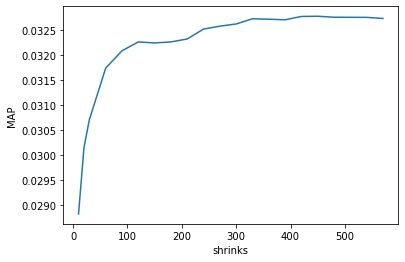

In [4]:
plt.plot(shrinks, map_vector)
plt.ylabel('MAP')
plt.xlabel('shrinks')
plt.show()

In [8]:
shrinks_2 = [i for i in range(600,1000, 50)]
map_vector_2 = []
for shrink in shrinks_2:
    print(shrink)
    recommender_experiment = item_knn_cf_cbf()
    recommender_experiment.fit(training_set=training.copy(),
                                   k=280,
                                   shrink=shrink,
                                   similarity='cosine')
    map_vector_2.append(evaluator.evaluate_already_trained(recommender=recommender_experiment)[2])
    print(map_vector_2[-1])

600
Similarity column 25975 ( 100 % ), 1124.83 column/sec, elapsed time 0.38 min
0.03276032794507325
650
Similarity column 25975 ( 100 % ), 1097.94 column/sec, elapsed time 0.39 min
0.03276321136251021
700
Similarity column 25975 ( 100 % ), 1142.81 column/sec, elapsed time 0.38 min
0.032761275856933794
750
Similarity column 25975 ( 100 % ), 1303.36 column/sec, elapsed time 0.33 min
0.03278023007219881
800
Similarity column 25975 ( 100 % ), 1271.72 column/sec, elapsed time 0.34 min
0.0327106221202585
850
Similarity column 25975 ( 100 % ), 1156.91 column/sec, elapsed time 0.37 min
0.03274430091099674
900
Similarity column 25975 ( 100 % ), 998.37 column/sec, elapsed time 0.43 min
0.03275311394115074
950
Similarity column 25975 ( 100 % ), 1185.48 column/sec, elapsed time 0.37 min
0.03272983389712657


In [10]:
recommender_top = item_knn_cf_cbf()
recommender_top.fit(training_set=training.copy(),
                k=280,
                shrink = 450,
                similarity='cosine')
map_ =evaluator.evaluate_already_trained(recommender=recommender_top)[2]
map_

Similarity column 25975 ( 100 % ), 1398.90 column/sec, elapsed time 0.31 min


0.03277965810389695

In [11]:
r = item_knn_cf_cbf()
r.fit(training_set=data_manager().get_urm(),
      k = 280,
      shrink = 450,
      similarity='cosine')
submission_helper(name_of_the_file='tuned_knn_cf_cbf',
                  recommender=r).build_submission()

Similarity column 25975 ( 100 % ), 1329.64 column/sec, elapsed time 0.33 min
